In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/machinecurve/extra_keras_datasets.git

Cloning into 'extra_keras_datasets'...
remote: Enumerating objects: 520, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 520 (delta 24), reused 26 (delta 11), pack-reused 467
Receiving objects: 100% (520/520), 2.47 MiB | 40.08 MiB/s, done.
Resolving deltas: 100% (304/304), done.


In [4]:
%matplotlib inline
import numpy as np                   
import matplotlib.pyplot as plt      
import random                        
# from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils  
import keras

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
# from keras.layers.normalization import BatchNormalization
# import tensorflow as tf
# tf.keras.layers.BatchNormalization()
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf



In [5]:
from extra_keras_datasets.extra_keras_datasets import emnist
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='byclass')
#It is a convention: X and y

INFO:root:Loading dataset = emnist


743915520/743900280 [==============================] - 48s 0us/step


In [6]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (697932, 28, 28)
y_train shape (697932,)
X_test shape (116323, 28, 28)
y_test shape (116323,)


In [7]:
LABELS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
          'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
          'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
len(LABELS)

62

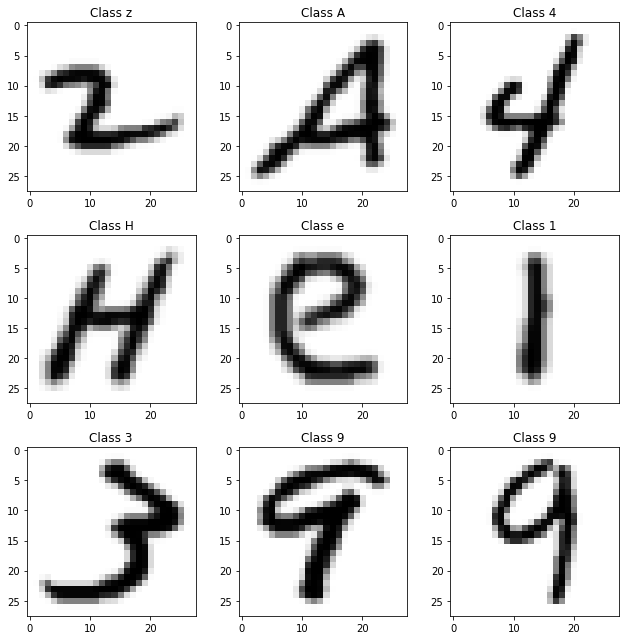

In [20]:
# plt.rcParams['figure.figsize'] = (14,14)  same as belows line 
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='binary', interpolation='nearest')
    plt.title("Class {}".format(LABELS[y_train[num]]))
    
    
plt.tight_layout()

In [ ]:
# Pre processing 


# expanding dim of img to (28,28,1)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test, -1)

# changing int to 32 bi to floating point no. and normalize each vector
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape (697932, 28, 28, 1)
y_train shape (697932,)
X_test shape (116323, 28, 28, 1)
y_test shape (116323,)


In [32]:

nb_classes = 62 # number of unique unbaised classes
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

X_train shape (697932, 28, 28)
y_train shape (697932, 62)
X_test shape (116323, 28, 28)
y_test shape (116323, 62)


In [ ]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(nb_classes,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 512)               2769408   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 62)                7998      
                                                        

In [36]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(62, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(62, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(124,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(62, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(496))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(62))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 62)        620       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 62)       248       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 62)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 62)        34658     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 62)       248       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 24, 24, 62)        0

In [38]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
5453/5453 [==============================] - 83s 15ms/step - loss: 0.4364 - accuracy: 0.8460
Epoch 2/10
5453/5453 [==============================] - 80s 15ms/step - loss: 0.3605 - accuracy: 0.8659
Epoch 3/10
5453/5453 [==============================] - 81s 15ms/step - loss: 0.3403 - accuracy: 0.8721
Epoch 4/10
5453/5453 [==============================] - 82s 15ms/step - loss: 0.3274 - accuracy: 0.8759
Epoch 5/10
5453/5453 [==============================] - 81s 15ms/step - loss: 0.3161 - accuracy: 0.8792
Epoch 6/10
5453/5453 [==============================] - 81s 15ms/step - loss: 0.3075 - accuracy: 0.8816
Epoch 7/10
5453/5453 [==============================] - 80s 15ms/step - loss: 0.2987 - accuracy: 0.8844
Epoch 8/10
5453/5453 [==============================] - 80s 15ms/step - loss: 0.2903 - accuracy: 0.8867
Epoch 9/10
5453/5453 [==============================] - 80s 15ms/step - loss: 0.2834 - accuracy: 0.8892
Epoch 10/10
5453/5453 [==============================] - 79s 15m

In [ ]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model.fit_generator(X_train, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

In [40]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

3636/3636 [==============================] - 14s 4ms/step - loss: 0.3347 - accuracy: 0.8763
Test score: 0.33470702171325684
Test accuracy: 0.8763099312782288


In [41]:

model.save('/content/drive/MyDrive/hcr3.h5')



In [42]:
model = keras.models.load_model('/content/drive/MyDrive/hcr3.h5', compile=False)

(1, 28, 28)
(1, 62)
(1, 62)
a


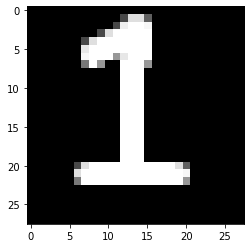

In [55]:
import cv2
test_img = cv2.imread('/content/Untitled.png', cv2.IMREAD_GRAYSCALE) 
# test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
# test_image = test_img 
# test_img= X_train[34]
test_img = cv2.resize(test_img, (28, 28))
plt.imshow(test_img, cmap="gray")
test_img = np.expand_dims(test_img, axis=0)
print(test_img.shape)
prediction = model.predict(test_img)
print(prediction.shape)
prediction= prediction[[0]]
print(prediction.shape)
lavel = str(LABELS[y_train[np.argmax(prediction)]])
print(lavel)


In [ ]:
visualize(convLayer01)

NameError: ignored